# FPGheArt - Week 5 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653


Lavoro:
* Prova con due nodi
* Prova con beta diversi e in posizioni diverse (positive phase o no)
* Controllare il bit correction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import RBM as rbm

## Data load and functions

In [2]:
q=0.1
fname = "DATA/dataRBM_seq4_q" + str(q) + ".csv"
v = np.loadtxt(fname, delimiter=",", dtype = int)
N = len(v)
L = len(v[0])

SPINS = True
if SPINS:
    vmin = -1
    GAP = 2
    v = 2*v - 1
else:
    vmin = 0
    GAP = 1
    
#store initial values
v0 = v.copy()

Some useful functions in order to show the results

In [3]:
def create_coord(np, x0):
    x = [x0] * np
    y = list(range(np))
    for i in range(np):
        y[i] = y[i]/(np-1.) - 0.5
    return (x, y)

def mycolor(val):
    if val > 0:
        return 'red'
    elif val < 0:
        return 'blue'
    return 'black'

def plotgraph(w, a, b, epoch=0, M = 3, L = 8):
    A = 2./w.max()
    (x1, y1) = create_coord(L, 0)
    (x2, y2) = create_coord(M, 1)
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i], x2[j]), (y1[i], y2[j]), mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder = 1, lw=A*np.abs(w[i][j]))
    A = 300./(a.max() + b.max())
    for i in range(L):
        plt.scatter(x1[i], y1[i], s = A*np.abs(a[i]), zorder = 2, c = mycolor(a[i]))
    for j in range(M):
        plt.scatter(x2[j], y2[j], s = A*np.abs(b[j]), zorder = 2, c = mycolor(b[j]))
    plt.title(f">0 red, <0 blue, epoch = {epoch}")
    plt.show()
    
def noise_score(seq):
    for n in range(N):
        for i in range(len(seq)):
            if (v0[n] == seq[i]).all():
                count += 1
                break

Sequences used to get rbm score

In [4]:
seqstr = ['11001100', '00111100', '11000011', '00110011']
seq = [[int(i)*2-1 for i in seqstr[j]] for j in range(len(seqstr))]

## RBM tests

Standard case with 3 nodes

In [5]:
my_rbm = rbm.RBM(random_state = 12)
my_rbm.fit(v)

In [6]:
my_rbm.score(v,seq)

0.4377

We can also see how weights w converges to the final result.

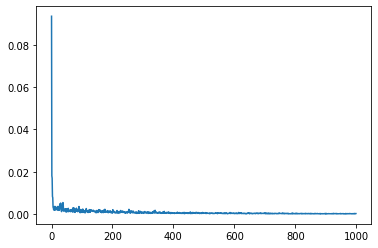

In [11]:
plt.plot(range(1000),my_rbm.dw_history)
plt.show()

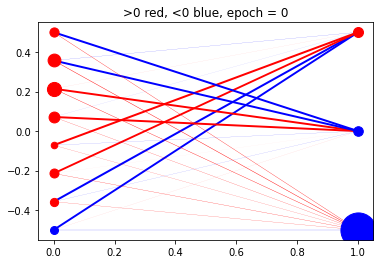

In [7]:
plotgraph(*(my_rbm.params()))

First test with 2 hidden nodes

In [5]:
my_rbm = rbm.RBM(M=2, random_state = 12)
my_rbm.fit(v)

In [6]:
my_rbm.score(v,seq)

0.1256

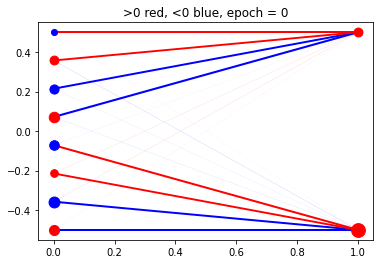

In [10]:
plotgraph(*(my_rbm.params()), M=2)

In [11]:
my_rbm.w

array([[-1.1098454 , -0.00987544],
       [-1.09729006,  0.03402777],
       [ 1.05923268,  0.03037763],
       [ 1.11286694, -0.01222565],
       [-0.02504975, -1.15003704],
       [-0.01730754, -1.09242654],
       [-0.04277435,  1.05806144],
       [-0.00604224,  1.11022822]])

We can try different values for beta to see if the score has any improvement

In [9]:
betas = list(np.arange(1,20,0.1))

In [31]:
scores_b = []
for beta in betas:
    scores_b.append(my_rbm.score(v,seq, beta = beta))


We can also try changing beta in the positive phase

In [32]:
scores_bh = []
for beta in betas:
    scores_bh.append(my_rbm.score(v,seq, beta = beta, beta_h = beta))


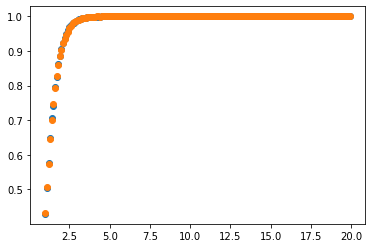

In [33]:
plt.scatter(betas, scores_bh)
plt.scatter(betas, scores_b)

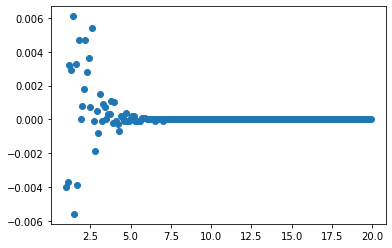

In [35]:
plt.scatter(betas, np.asarray(scores_bh) - np.asarray(scores_b))

## Compare with clean

In [6]:
q=0.1
fname = "DATA/dataRBM_clean4_q" + str(q) + ".csv"
v_c = np.loadtxt(fname, delimiter=",", dtype = int)

SPINS = True
if SPINS:
    vmin = -1
    GAP = 2
    v_c = 2*v_c - 1
else:
    vmin = 0
    GAP = 1


In [7]:
my_rbm.compare(v0, v_c, beta=5)

0.9358

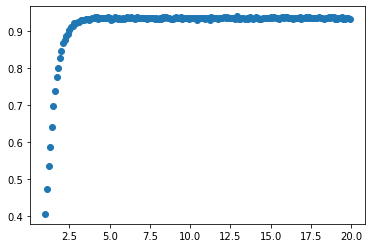

In [10]:
scores_comp = []
for beta in betas:
    scores_comp.append(my_rbm.compare(v0,v_c, beta = beta))

plt.scatter(betas, scores_comp)
plt.show()

## 5 Sequences

In [16]:
q=0.1
fname = "DATA/dataRBM_seq5_q" + str(q) + ".csv"
v_5 = np.loadtxt(fname, delimiter=",", dtype = int)

SPINS = True
if SPINS:
    vmin = -1
    GAP = 2
    v_5 = 2*v_5 - 1
else:
    vmin = 0
    GAP = 1

seqstr = ['11001100', '00111100', '11000011', '00110011', '11111111']
seq = [[int(i)*2-1 for i in seqstr[j]] for j in range(len(seqstr))]

In [19]:
my_rbm = rbm.RBM(M=5, random_state = 12)
my_rbm.fit(v_5)
my_rbm.score(v_5,seq)

0.5933

In [25]:
Ml = [2,3,4,5,6,7]
M_score = []
for M in Ml:
    my_rbm = rbm.RBM(M=M, random_state = 12)
    my_rbm.fit(v_5)
    M_score.append(my_rbm.score(v_5,seq, beta = 6))
    #plotgraph(*(my_rbm.params()), M=M)

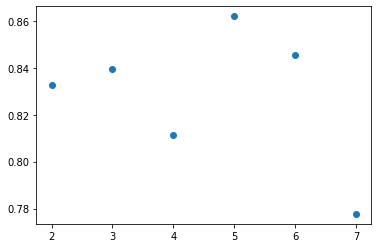

In [26]:
plt.scatter(Ml, M_score)

## Using spins = False

In [7]:
q=0.1
fname = "DATA/dataRBM_q" + str(q) + ".csv"
v = np.loadtxt(fname, delimiter=",", dtype = int)
N = len(v)
L = len(v[0])

SPINS = False
if SPINS:
    vmin = -1
    GAP = 2
    v = 2*v - 1
else:
    vmin = 0
    GAP = 1
    
#store initial values
v0 = v

In [8]:
my_rbm = rbm.RBM(M=2)
my_rbm.fit(v)

In [9]:
my_rbm.score(v,seq)

0.0

We can see how convergence changes from the spin = True case

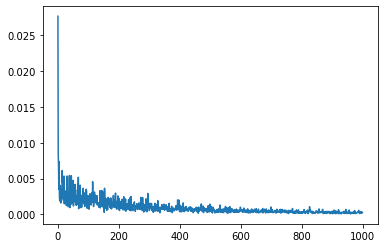

In [14]:
plt.plot(range(1000),my_rbm.dw_history)

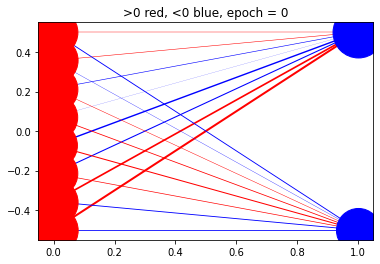

In [21]:
plotgraph(*(my_rbm.params()), M=2)